<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_22_Distribuci%C3%B3n_normal_estandarizada_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución norma estándar Z



# Objetivo

Tranformar valores de una variable continua $x$ a valores de $z$ para calcular probabilidades en función de una distribución normal estándar $z$



# Descripción

- Cargar librerías
- Cargar funciones
- Fórmula de z
- Transfoamr valores de $x$ a $z$
- Calcular probabilidades




# Fundamento teórico

La distribución normal estándar o distribución normal tipificada es una distribución normal singular cuya denominación es media igual a cero y desviación estándar igual a 1. μ=0; σ=1.

Se necesita una variable, $z$ que representa el producto de una transformación o cambio de variable continua $x$ que sigue una distribución normal del tipo $N(μ = 0, σ = 1$.

Esta transformación se llama tipificación (también estandarización o normalización):

¿Porqué $z$?, en general, el valor de $z$
se interpreta como el número de desviaciones estándar que están comprendidas entre el promedio y un cierto valor de variable $x$.

Se identifica $z$ como la diferencia entre un valor de la variable y el promedio, expresada esta diferencia en cantidad de desviaciones estándar.[mendenhall2006?)].

Entonces, a partir de cualquier variable aleatoria $x$ que siga una distribución normal, se puede obtener otra característica $z$ con una distribución normal estándar, sin más que efectuar la transformación conforme y de acuerdo a la fórmula.

Visualmente, la densidad de una variable aleatoria de $z$ es igual a la densidad de una variable aleatoria $x$, es decir el comportamiento de la curva es una gráfica de gauss o campana. Los valores de ambas densidades varían porque la media de una estándar es $\mu=0$ y la desviación es $\sigma = 1$.


## ¿Para qué se utiliza la distribucion normal estándar z?

Se utiliza para estandarizar variables aleatorias normales, convirtiéndolas en puntuaciones $z$.

La estandarización es útil en estadística y análisis de datos por varias razones:

- Comparación de diferentes escalas: cuando se estás¿ trabajando con diferentes conjuntos de datos que pueden tener unidades o escalas diferentes, la estandarización permite comparar las observaciones en una escala común.

- Identificación de valores atípicos (*outliers* o extremos): Al convertir los datos en puntuaciones $z$, se puede identificar fácilmente valores atípicos. Los valores $z$ que están muy lejos de cero (por ejemplo, mayores que 3 o meno+res que -3) pueden indicar observaciones inusuales.

- Cálculos de Probabilidades: Al igual que si fuera una distribución  normal, solo que en lugar de $x$ es $z$: La distribución normal estándar (también conocida como tabla $z$) se utiliza para calcular probabilidades asociadas con puntuaciones $z$. Esto es útil en inferencia estadística y pruebas de hipótesis.

- Normalización de Datos: Al estandarizar variables que implica normalizar los datos, generalmente simplifica los cálculos y facilita la interpretación de los resultados. [https://chat.openai.com]

## Regla empírica

- Aproximadamente $68$% de las observaciones caerán entre más y menos una desviación estándar de la media.
- Aproximadamente $95$% de las observaciones caerán entre más y menos dos desviaciones estándar de la media.
- Prácticamente todas, o $99.7$% de las observaciones caerán entre más y menos tres desviaciones estándar de la media.[@lind2015].

## Fórmula para calcular $z$

$$
z = \frac{x - \mu}{\sigma}
$$

$$
x \text{ es el valor de una variable aleatoria continua de una distribución  normal} \\
\sigma \text{ desviación estándar de población} \\
\mu \text{ media de la población}
$$

## Ejemplo. Tranformar un valor de $x$ a $z$

Tranformar una variable aletoria que proviene de una distribución de media igual a $\mu = 20$ y desviación estándar de $5$.
- El valor de $x$ es 6; ¿cuál es el valor de z?
- El valor de $x$ es 25; ¿cuál es el valor de z?


$$
z = \frac{x - \mu}{\sigma} = z = \frac{6 - 20}{5} = z = \frac{-14}{5} = -2.8
$$

Significa que el valor de $x=6$ corresponde a una tranformación de $z = -2.8$.

$$
z = \frac{x - \mu}{\sigma} = z = \frac{25 - 20}{5} = z = \frac{5}{5} = 1
$$

Significa que el valor de $x=25$ corresponde a una tranformación de $z = 1$.


# Desarrollo



## Cargar librerías

Se van a cargar las librerias similares al caso anterior.



In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

## Cargar funciones

Se van a utilizar funciones similares al caso 21 agregando la función para tranformar $x$ a $z$.




In [88]:
# Densidad normal
def f_x_normal(x, media, desv_std):
  # Calcular la PDF de la variable aleatoria continua
  fx = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  return fx

# Función para visualizar la densidad de probabilidad de una distribución normal
def f_visualizar_dens_normal(valores, titulo):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la crear una densidad
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std **2))

    # Visualizar la PDF
    plt.plot(x, pdf, label=titulo + '(media:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    plt.title('Función de Densidad - Distribución ' + titulo)
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad ')
    plt.legend(loc='upper right')

    # plt.show()

def f_visualizar_dens_area_normal(valores, a, b, prob=0, v_color = 'red', titulo='normal'):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne estándar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))

    # La probabilidad
    prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)
    # Visualizar la PDF
    plt.plot(x, pdf, label=titulo+':(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    if prob == 0:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área bajo la curva')
    else:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área ['+str(np.round(a)) + " a "+str(np.round(b))+"]="+str(np.round(prob * 100, 2))+"%")

    plt.title('Función de Probabilidad (PDF) - '+titulo)
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad ')
    plt.legend(loc='upper right')
    # plt.grid(True)
    #plt.show()

def f_visualizar_frecuencia(frecuencia):
  # Crear gráfico de barras
  plt.bar(frecuencia.index, frecuencia)

  # Agregar etiquetas y título
  plt.xlabel('Variable')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia en los Datos')

  # Mostrar el gráfico
  plt.show()

def f_visualizar_VE_desv_std_normal(valores):
  # Se calcula la media de los valores
  VE = media = np.mean(valores)

  # Se calcula la desviacióne st´dnar de los valores
  desv_std = np.std(valores)

  # Crear un rango de valores para la PDF
  x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

  # Calcular la PDF de la distribución normal
  pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))

  # Agregar una línea punteada
  plt.axvline(x=VE, color='red', linestyle='--', label='VE='+str(np.round(VE, 2)))
  plt.axvline(x=VE - desv_std, color='blue', linestyle='--', label='Desv. Std='+str(np.round(desv_std, 2)))
  plt.axvline(x=VE + desv_std, color='blue', linestyle='--')

  # La probadilidad de VE ± desv_std
  a = VE - desv_std
  b = VE + desv_std
  prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)

  plt.fill_between(x, 0, pdf, where=(x >= VE - desv_std) & (x <= VE + desv_std), alpha=0.3, color='red', label='Área '+str(np.round(VE - desv_std, 2)) + "-"+str(np.round(VE + desv_std, 2))+ "="+str(np.round(prob, 2)))


  plt.title('VE y desviación estándar de los datos. Distribución Normal')
  plt.xlabel('Valor de x')
  plt.ylabel('Densidad de Probabilidad')
  plt.legend(loc='upper right')
  # plt.grid(True)
  plt.show()

# Se reciben valores de x y se devuelven valores en z
def f_transformar_x_z(x, media, desv_std):
  x = (x - media) / desv_std
  return x


## Transformar valores de x a z

Se utiliza la función *f_transformar_x_z()*



In [57]:
media = 20
desv_std = 5
x = 6
z = f_transformar_x_z(x, media, desv_std)
print ("El valor de x = ",x,"transformado a z es: ",np.round(z, 4))



El valor de x =  6 transformado a z es:  -2.8


In [58]:
media = 20
desv_std = 5
x = 25
z = f_transformar_x_z(x, media, desv_std)
print ("El valor de x = ",x,"transformado a z es: ",np.round(z, 4))


El valor de x =  25 transformado a z es:  1.0


## Generando números aleatorios

Se generan los similares números aleatorios del caso anterior

### Semilla

In [7]:
np.random.seed(2023)

Se generan cien números aleatorios con media de $80$ y desviación estándar de $5$; $\mu=80$; $\sigma=5$ .

In [59]:
media = 80
desv_std = 5
num_aleatorios = norm.rvs(loc = media, scale = desv_std, size = 100)
print(np.round(num_aleatorios, 4))

media = np.mean(num_aleatorios)
desv_std = np.std(num_aleatorios)
print("Los estadísticos a partir de los datos den ser similares a 80 y 5 respectivamente")
print ("La media de los datos = ", np.round(media, 2))
print ("La desviación estándar de los datos = ", np.round(desv_std, 2))


[74.8215 80.2165 88.2343 80.3249 80.2318 76.2008 85.9496 84.3375 83.3124
 77.4108 79.9097 78.7976 83.7267 85.7087 81.6479 74.7668 84.3064 79.3571
 75.5391 75.6141 85.3331 79.9515 74.0445 76.5507 80.4752 80.378  76.0317
 80.5255 71.9147 73.4634 75.64   80.0669 79.7737 80.7696 74.5436 81.4991
 78.7673 79.4149 73.2477 80.12   84.9882 82.8488 85.4744 80.6624 74.3295
 80.4793 76.3867 73.1511 83.3954 81.9458 78.3934 81.752  75.3103 75.3638
 78.3047 77.5908 75.6838 81.9684 78.2576 77.3465 85.0808 77.7376 84.3306
 91.4262 75.4072 79.2651 80.2022 72.7493 82.686  80.8041 80.3533 90.0433
 82.213  75.4328 87.2482 78.9453 80.5313 82.3968 71.7788 75.8478 91.1713
 79.8298 86.3795 73.3703 83.6203 83.0052 76.2672 72.9594 78.9458 77.3029
 75.3671 86.3785 72.8794 70.065  86.1545 82.5339 79.491  77.8866 90.208
 74.9133]
Los estadísticos a partir de los datos den ser similares a 80 y 5 respectivamente
La media de los datos =  79.7
La desviación estándar de los datos =  4.58


### Transformar estos números aleatorios a valores z

Con la media y la desviación etándar calculados; con los datos de los números aleatorios generados, se transforma a valores en $z$ usando la función *f_transformar_x_z*.

In [60]:

# Transformar
zs = f_transformar_x_z(num_aleatorios, media, desv_std)
print ("Valores de z")
print (zs)

Valores de z
[-1.06487753  0.11330995  1.86425764  0.13698528  0.11665488 -0.76366323
  1.3653167   1.01325593  0.78939295 -0.49941011  0.04630925 -0.19656886
  0.87986825  1.31271395  0.42588747 -1.07681117  1.00647371 -0.07436516
 -0.9081555  -0.89179352  1.23067341  0.05544083 -1.23455695 -0.68723846
  0.16980515  0.14856523 -0.80059108  0.18079266 -1.69966916 -1.36145836
 -0.88612344  0.08063026  0.01661136  0.23408461 -1.12557296  0.39339369
 -0.2031786  -0.0617438  -1.40857808  0.09222387  1.15536903  0.68814475
  1.2615447   0.21067956 -1.1723104   0.17068458 -0.72305367 -1.42966622
  0.80752642  0.49094572 -0.28482544  0.44862647 -0.95812158 -0.94645326
 -0.30420123 -0.4601075  -0.87655393  0.49588004 -0.31449175 -0.51345365
  1.17558686 -0.42803753  1.01175119  2.56132606 -0.93695827 -0.0944734
  0.11018839 -1.5174122   0.65260308  0.24161709  0.14318585  2.25932411
  0.54929786 -0.93138522  1.6489111  -0.16430152  0.18205793  0.58943787
 -1.72934208 -0.84074724  2.50565525  0

### Densidad con respecto de z

Se manda llamar la función que visualiza la densidad *f_visualizar_dens_normal()* tanto de los números aleatorios como la densidad de los valores de transformados en $z$.

Las gráficas son similars, solo varía el valor de la densidad de cada gráfica dado que la media y la deviación estándar de una normal estandarizada es $\mu=0$ y $\sigma=1$.

El siguiente código visualiza las dos densidades en un mimso renglón, mandando llamar la función.


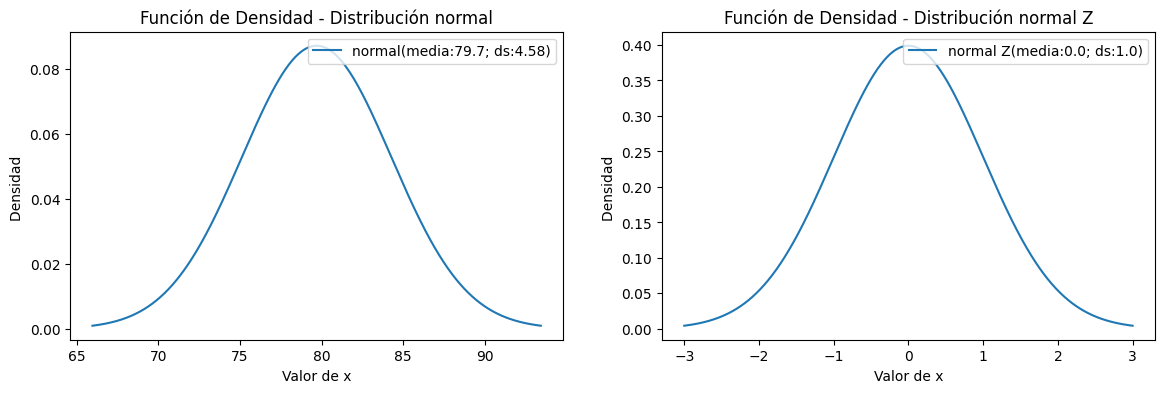

In [63]:
# Crear una figura con dos subgráficos en una fila
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)  # Primer subgráfico
f_visualizar_dens_normal(num_aleatorios, "normal")
plt.subplot(1, 2, 2)  # Segundo subgráfico
f_visualizar_dens_normal(zs, "normal Z")
plt.show()



### Probabilidad con respecto de z

Calcular probabilidades en distribución  normal estándarizada $z$ es semejante a calcular probabilidades en distribución normal.

#### Probabilidad de que x sea menor que 75

$F(x \le 75)$

Con los mismos datos iniciales de $\mu\approx80$ y $\sigma ≈ 5$ y los datos aletorios además de los datos de $z$, se convierte $x$ de 75 a $z$ y se calculan probabilidades.

Se visualizan ambas probabilidades tanto con distribución normal como con distribución $z$; debe de obtenerse la misma probabilida en ambas distribuciones:




In [89]:
x1 = z1 = -np.Inf
x2 = 75
z2 = f_transformar_x_z(x, media, desv_std)
print ("El valor de x2 = ",x2,"transformado a z es: ",np.round(z2, 4))


El valor de x2 =  75 transformado a z es:  -1.0259


Ahora calcular la probabilidad f(x ≤75 ) con la función previamente codificada que visualiza el área sombreada bajo la curva representando la probabilidad en ambas gráficas, tanto en distribución normal como en distribución normal estandarizada de $z$.

La probabilidad entre  -inf  y  75  es 0.1525 aproximadamente  15.2471 %


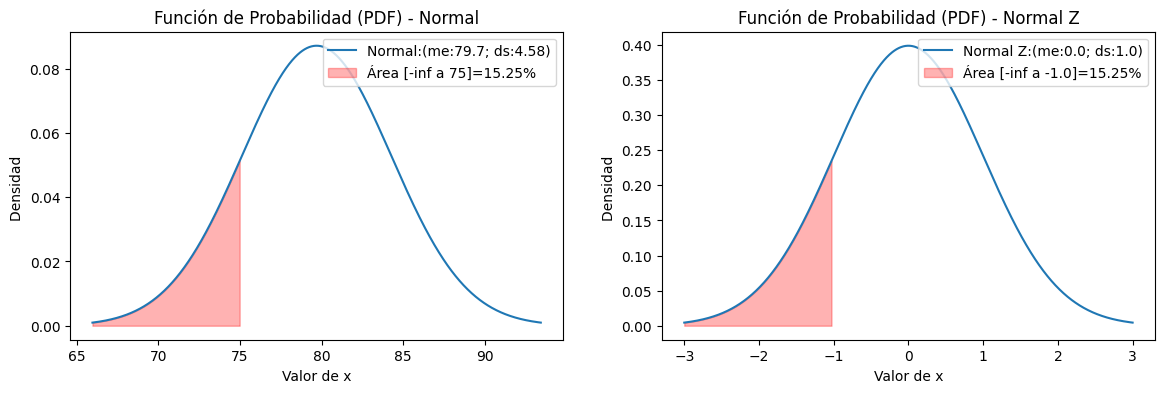

In [90]:
# Ahora calcular la probabilidad f(x ≤75 )
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 4), "%")

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)  # Primer subgráfico
f_visualizar_dens_area_normal(num_aleatorios, x1, x2, titulo = 'Normal')
plt.subplot(1, 2, 2)  # Segundo subgráfico
f_visualizar_dens_area_normal(zs, z1, z2, titulo = 'Normal Z')

plt.show()

# Interpretación

- ¿qué significa transformar variables aleatorias $x$ a variables $z$?.
- ¿qué características tiene una distribución normal estándar $z$?.
- ¿para qué se utiliza la distribución normal estándar $z$?.


# Bibliografía

- Anderson, David R., Dennis J. Sweeney, and Thomas A. Williams. 2008. Estadística Para Administración y Economía. 10th ed. Australia • Brasil • Corea • España • Estados Unidos • Japón • México • Reino Unido • Singapur: Cengage Learning,.
- Lind, Douglas, William Marchal, and Samuel Wathen. 2015. Estadística Aplicada a Los Negocios y La Economía. Decimo Sexta. México, D.F.: McGraw-Hill.
- Mendenhall, William, Robert J. Beaver, and Barbara M. Beaver. 2006. Introducción a La Probabilidad y Estadística. 13a Edición.
- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.

- https://chat.openai.com